In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from geopy import distance

In [2]:
a=np.array([1,2])
a=np.append(a,[1,2,3])
a


array([1, 2, 1, 2, 3])

In [4]:
df=pd.read_csv('./data/gps_result.csv',index_col=False)
df['latitude'] = df['latitude'].interpolate(method='nearest')
df['longitude'] = df['longitude'].interpolate(method='nearest')
df.shape

(202877, 11)

In [5]:
df[df.tnv==1]

,tnv,time,provider,network_type,accuracy,latitude,longitude,altitude,bearing,speed,travelstate
0,1,1364356963,network,wifi,24.0,43.759135,-72.329240,0.000000,0.0,0.0,stationary
1,1,1364358144,gps,NaN,22.0,43.759503,-72.329018,250.899994,0.0,0.0,NaN
2,1,1364359364,network,wifi,23.0,43.759134,-72.329238,0.000000,0.0,0.0,stationary
3,1,1364360563,network,wifi,25.0,43.759135,-72.329240,0.000000,0.0,0.0,stationary
4,1,1364361763,network,wifi,25.0,43.759135,-72.329240,0.000000,0.0,0.0,stationary
...,...,...,...,...,...,...,...,...,...,...,...
4311,1,1370046240,network,cell,3666.0,43.915629,-72.137155,0.000000,0.0,0.0,stationary
4312,1,1370046840,network,cell,4272.0,43.844053,-72.195357,0.000000,0.0,0.0,moving
4313,1,1370047440,network,cell,2796.0,43.821731,-72.204947,0.000000,0.0,0.0,moving
4314,1,1370048040,network,cell,3666.0,43.915629,-72.137155,0.000000,0.0,0.0,stationary


In [6]:
dist=np.array([])
def dista(df,i,dist):
    if i==0:
        return np.append(dist,[0]) 
    if df.tnv[i]==df.tnv[i-1]:
        lat1=df.latitude.iloc[i-1]
        lat2=df.latitude.iloc[i]
        lon1=df.latitude.iloc[i-1]
        lon2=df.latitude.iloc[i]
        d = distance.distance([lat1,lon1], [lat2,lon2]).m
        return np.append(dist,[d])
    else: return np.append(dist,[0])
    
for i in range(0,len(df)):
    dist=dista(df,i,dist)
    
dist.shape

(202877,)

In [7]:
dist

array([ 0.        , 50.55264273, 50.58008719, ...,  1.92358721,
        0.48786631,  3.1920394 ])

In [8]:
df['distance']=dist
df

,tnv,time,provider,network_type,accuracy,latitude,longitude,altitude,bearing,speed,travelstate,distance
0,1,1364356963,network,wifi,24.0,43.759135,-72.329240,0.000000,0.0,0.0,stationary,0.000000
1,1,1364358144,gps,NaN,22.0,43.759503,-72.329018,250.899994,0.0,0.0,NaN,50.552643
2,1,1364359364,network,wifi,23.0,43.759134,-72.329238,0.000000,0.0,0.0,stationary,50.580087
3,1,1364360563,network,wifi,25.0,43.759135,-72.329240,0.000000,0.0,0.0,stationary,0.027444
4,1,1364361763,network,wifi,25.0,43.759135,-72.329240,0.000000,0.0,0.0,stationary,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
202872,60,1370056628,network,wifi,22.0,40.914261,-73.792014,0.000000,0.0,0.0,stationary,0.738769
202873,60,1370057227,network,wifi,36.0,40.914236,-73.792047,0.000000,0.0,0.0,stationary,3.401125
202874,60,1370057827,network,wifi,39.0,40.914250,-73.792028,0.000000,0.0,0.0,stationary,1.923587
202875,60,1370058427,network,wifi,39.0,40.914247,-73.792007,0.000000,0.0,0.0,stationary,0.487866


In [9]:
df.latitude.iloc[0]

43.7591346

In [10]:
v=np.array([])
def velocity(df,i,var):
    if i==0:
        return np.append(var,[0]) 
    if df.tnv[i]==df.tnv[i-1]:
        time=df.time.iloc[i]-df.time.iloc[i-1]
        d = df.distance.iloc[i]/time
        return np.append(var,[d])
    else: return np.append(var,[0])
    
for i in range(0,len(df)):
    v=velocity(df,i,v)
    
v

array([0.        , 0.04280495, 0.04145909, ..., 0.00320598, 0.00081311,
       0.00531121])

In [11]:
df['velocity']=v
df

,tnv,time,provider,network_type,accuracy,latitude,longitude,altitude,bearing,speed,travelstate,distance,velocity
0,1,1364356963,network,wifi,24.0,43.759135,-72.329240,0.000000,0.0,0.0,stationary,0.000000,0.000000
1,1,1364358144,gps,NaN,22.0,43.759503,-72.329018,250.899994,0.0,0.0,NaN,50.552643,0.042805
2,1,1364359364,network,wifi,23.0,43.759134,-72.329238,0.000000,0.0,0.0,stationary,50.580087,0.041459
3,1,1364360563,network,wifi,25.0,43.759135,-72.329240,0.000000,0.0,0.0,stationary,0.027444,0.000023
4,1,1364361763,network,wifi,25.0,43.759135,-72.329240,0.000000,0.0,0.0,stationary,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
202872,60,1370056628,network,wifi,22.0,40.914261,-73.792014,0.000000,0.0,0.0,stationary,0.738769,0.001229
202873,60,1370057227,network,wifi,36.0,40.914236,-73.792047,0.000000,0.0,0.0,stationary,3.401125,0.005678
202874,60,1370057827,network,wifi,39.0,40.914250,-73.792028,0.000000,0.0,0.0,stationary,1.923587,0.003206
202875,60,1370058427,network,wifi,39.0,40.914247,-73.792007,0.000000,0.0,0.0,stationary,0.487866,0.000813


In [12]:
a=np.array([])
def accelerate(df,i,var):
    if i==0:
        return np.append(var,[0]) 
    if df.tnv[i]==df.tnv[i-1]:
        time=df.time.iloc[i]-df.time.iloc[i-1]
        d = df.velocity.iloc[i]/time
        return np.append(var,[d])
    else: return np.append(var,[0])
    
for i in range(0,len(df)):
    a=accelerate(df,i,a)
    
a

array([0.00000000e+00, 3.62446632e-05, 3.39828589e-05, ...,
       5.34329781e-06, 1.35518419e-06, 8.83729391e-06])

In [13]:
df['accelerate']=a
df

,tnv,time,provider,network_type,accuracy,latitude,longitude,altitude,bearing,speed,travelstate,distance,velocity,accelerate
0,1,1364356963,network,wifi,24.0,43.759135,-72.329240,0.000000,0.0,0.0,stationary,0.000000,0.000000,0.000000e+00
1,1,1364358144,gps,NaN,22.0,43.759503,-72.329018,250.899994,0.0,0.0,NaN,50.552643,0.042805,3.624466e-05
2,1,1364359364,network,wifi,23.0,43.759134,-72.329238,0.000000,0.0,0.0,stationary,50.580087,0.041459,3.398286e-05
3,1,1364360563,network,wifi,25.0,43.759135,-72.329240,0.000000,0.0,0.0,stationary,0.027444,0.000023,1.909046e-08
4,1,1364361763,network,wifi,25.0,43.759135,-72.329240,0.000000,0.0,0.0,stationary,0.000000,0.000000,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202872,60,1370056628,network,wifi,22.0,40.914261,-73.792014,0.000000,0.0,0.0,stationary,0.738769,0.001229,2.045313e-06
202873,60,1370057227,network,wifi,36.0,40.914236,-73.792047,0.000000,0.0,0.0,stationary,3.401125,0.005678,9.479141e-06
202874,60,1370057827,network,wifi,39.0,40.914250,-73.792028,0.000000,0.0,0.0,stationary,1.923587,0.003206,5.343298e-06
202875,60,1370058427,network,wifi,39.0,40.914247,-73.792007,0.000000,0.0,0.0,stationary,0.487866,0.000813,1.355184e-06


In [45]:
from datetime import datetime
def changedate(x):
    day=datetime.fromtimestamp(x).strftime("%A, %d %B, %Y ")
    return day
df['date']=df['time'].apply(lambda x: changedate(x))

def changedate(x):
    time=datetime.fromtimestamp(x).strftime("%H h %M min %S sec")
    return time
df['time in date']=df['time'].apply(lambda x: changedate(x))
def changedate(x):
    time=datetime.fromtimestamp(x).strftime("%H")
    return time
df['hour in date']=df['time'].apply(lambda x: changedate(x))
def changedate(x):
    time=datetime.fromtimestamp(x).strftime("%M")
    return time
df['min in date']=df['time'].apply(lambda x: changedate(x))
df

,tnv,time,provider,network_type,accuracy,latitude,longitude,altitude,bearing,speed,travelstate,distance,velocity,accelerate,date,time in date,hour in date,min in date
0,1,1364356963,network,wifi,24.0,43.759135,-72.329240,0.000000,0.0,0.0,stationary,0.000000,0.000000,0.000000e+00,"Wednesday, 27 March, 2013",11 h 02 min 43 sec,11,02
1,1,1364358144,gps,NaN,22.0,43.759503,-72.329018,250.899994,0.0,0.0,NaN,50.552643,0.042805,3.624466e-05,"Wednesday, 27 March, 2013",11 h 22 min 24 sec,11,22
2,1,1364359364,network,wifi,23.0,43.759134,-72.329238,0.000000,0.0,0.0,stationary,50.580087,0.041459,3.398286e-05,"Wednesday, 27 March, 2013",11 h 42 min 44 sec,11,42
3,1,1364360563,network,wifi,25.0,43.759135,-72.329240,0.000000,0.0,0.0,stationary,0.027444,0.000023,1.909046e-08,"Wednesday, 27 March, 2013",12 h 02 min 43 sec,12,02
4,1,1364361763,network,wifi,25.0,43.759135,-72.329240,0.000000,0.0,0.0,stationary,0.000000,0.000000,0.000000e+00,"Wednesday, 27 March, 2013",12 h 22 min 43 sec,12,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202872,60,1370056628,network,wifi,22.0,40.914261,-73.792014,0.000000,0.0,0.0,stationary,0.738769,0.001229,2.045313e-06,"Saturday, 01 June, 2013",10 h 17 min 08 sec,10,17
202873,60,1370057227,network,wifi,36.0,40.914236,-73.792047,0.000000,0.0,0.0,stationary,3.401125,0.005678,9.479141e-06,"Saturday, 01 June, 2013",10 h 27 min 07 sec,10,27
202874,60,1370057827,network,wifi,39.0,40.914250,-73.792028,0.000000,0.0,0.0,stationary,1.923587,0.003206,5.343298e-06,"Saturday, 01 June, 2013",10 h 37 min 07 sec,10,37
202875,60,1370058427,network,wifi,39.0,40.914247,-73.792007,0.000000,0.0,0.0,stationary,0.487866,0.000813,1.355184e-06,"Saturday, 01 June, 2013",10 h 47 min 07 sec,10,47


12

In [46]:
df.to_csv('working_gps.csv')

In [47]:
#finish create dataframe xva
# 

In [16]:
data=df[['tnv','distance','velocity','accelerate']]

In [17]:
data[data.tnv==1]

,tnv,distance,velocity,accelerate
0,1,0.000000,0.000000,0.000000e+00
1,1,50.552643,0.042805,3.624466e-05
2,1,50.580087,0.041459,3.398286e-05
3,1,0.027444,0.000023,1.909046e-08
4,1,0.000000,0.000000,0.000000e+00
...,...,...,...,...
4311,1,14892.156434,24.820261,4.136710e-02
4312,1,9815.114568,16.358524,2.726421e-02
4313,1,3061.764774,5.102941,8.504902e-03
4314,1,12876.878302,21.461464,3.576911e-02


In [18]:
data.groupby('tnv').describe()

distance                                                                   \
       count         mean           std  min       25%        50%         75%   
tnv                                                                             
1     4316.0  2282.887503  33192.906659  0.0  0.000000   0.713774   20.485280   
2     5541.0    47.321840    380.818854  0.0  1.029470   3.390390    8.976987   
3     6607.0    93.343446   1321.422496  0.0  1.015769   2.553080    5.751442   
4     3502.0    24.018216    329.430151  0.0  0.919668   2.072683    4.063010   
5     3620.0   643.835658  12963.882758  0.0  1.276561   3.843397   23.921884   
6     5388.0    84.868067   2020.509098  0.0  0.988317   2.573689    6.152824   
8     3105.0   135.413055   3568.981767  0.0  1.056939   2.374682    4.721912   
9     6192.0    64.949130   1622.526511  0.0  1.509914   3.802203    8.743800   
10    5062.0   166.650681   3173.517792  0.0  1.207909   2.868769    6.670952   
11    4457.0    35.999470    105.271739  0.0  1.605985   3.788407    8.606432   
13    6547.0   824.397068  13740.355705  0.0  1.359429   3.886045   13.385630   
14    6604.0   195.097528   1259.261842  0.0  0.837303   2.409333    6.249372   
15    3805.0   137.243744   4277.508455  0.0  1.839330   4.474805   12.205459   
16    1788.0   707.877998  13146.954465  0.0  1.496186   4.310111   11.832213   
17    5890.0    36.067876    452.823094  0.0  1.002034   2.354077    4.900361   
18    6400.0    19.077772     73.355401  0.0  1.441277   3.527698    6.931857   
19    3699.0   130.157370   3236.298391  0.0  1.084372   2.635463    5.696462   
20    4598.0    77.169417   1485.844211  0.0  1.331447   3.129587    7.041755   
21    2833.0    15.748512     61.087345  0.0  1.331458   3.362950    7.453421   
23    3729.0   512.107619  20551.346717  0.0  1.180476   2.731566    5.929834   
24    2888.0    23.307502     72.127661  0.0  1.907966   4.776777   11.663975   
25    2151.0    61.931916    579.381287  0.0  1.118694   2.498188    5.339532   
26    1801.0  1120.305522  17259.255164  0.0  1.221653   3.541498   10.486943   
28    4442.0    22.280377     77.522578  0.0  1.825621   5.222923   11.008629   
31    3847.0  1312.368860  20983.902585  0.0  2.278594   6.739755   19.958474   
32    4203.0   633.775709   3650.260384  0.0  1.043351   3.926296   15.143581   
33    3820.0   145.749325   4040.311632  0.0  1.798172   4.447385    9.896709   
34    2809.0    26.343331     97.512410  0.0  1.249129   3.115919    6.794711   
35    2099.0   307.715380   1379.474036  0.0  0.336327   3.459953   11.982676   
36    4340.0    86.526689    776.339817  0.0  0.974573   2.264852    4.502251   
37    5422.0  1315.025133  29798.298042  0.0  0.933387   2.581337    7.517456   
40    1349.0   164.544218   1856.330821  0.0  2.292286   6.837789   16.766331   
42    3038.0    29.148563     96.474998  0.0  1.688355   3.870866    8.592768   
43    2958.0   254.406637   1241.077930  0.0  1.386346   3.322654    7.249427   
44    4302.0   366.827177   5818.313201  0.0  1.894236   5.332675   15.291227   
45    4146.0    92.243298    430.097903  0.0  1.880655   5.490736   13.534102   
46    2303.0   481.392741   3330.102379  0.0  1.358854   5.888208   17.734337   
47    3808.0   210.950483   2916.952991  0.0  1.331454   3.157086   13.130600   
48    3418.0   181.411769   1450.563512  0.0  0.096098   1.605974    4.914530   
50    3917.0   365.661435   5488.055448  0.0  1.309185   3.980608   34.686487   
51    2927.0   152.797351   7529.772263  0.0  0.851029   1.907953    3.819359   
52    6380.0   224.971853   4104.603420  0.0  0.000000   0.137263    2.374647   
53    5023.0   135.463800   2993.651146  0.0  1.715782   5.051255   15.705075   
54    3925.0   135.135126   2612.832379  0.0  1.262826   2.937420    6.163136   
55    2546.0   814.346229  10588.041043  0.0  0.000000  15.901980  338.249581   
57    3611.0   879.140803   9478.169718  0.0  0.192168   2.223534    6.807857   
58    5856.0   280.827653   2434.55

In [19]:
data[data.tnv==60].sort_values('distance',ascending=False)

,tnv,distance,velocity,accelerate
200634,60,1.947670e+06,34.785420,0.000621
200333,60,1.531742e+06,19.259927,0.000242
200322,60,1.927725e+05,4.560397,0.000108
200309,60,1.735249e+05,44.734451,0.011532
198967,60,1.722827e+05,143.568957,0.119641
...,...,...,...,...
202631,60,0.000000e+00,0.000000,0.000000
202634,60,0.000000e+00,0.000000,0.000000
199662,60,0.000000e+00,0.000000,0.000000
199664,60,0.000000e+00,0.000000,0.000000


In [20]:
df.iloc[200633:200635,:]

,tnv,time,provider,network_type,accuracy,latitude,longitude,altitude,bearing,speed,travelstate,distance,velocity,accelerate,date,time in date
200633,60,1368527320,network,wifi,20.955,29.988000,-90.258931,0.0,0.0,0.0,stationary,2.445575e+01,0.04076,0.000068,"Tuesday, 14 May, 2013",05:28:40
200634,60,1368583311,network,wifi,20.000,43.707336,-72.289166,0.0,0.0,0.0,moving,1.947670e+06,34.78542,0.000621,"Wednesday, 15 May, 2013",09:01:51


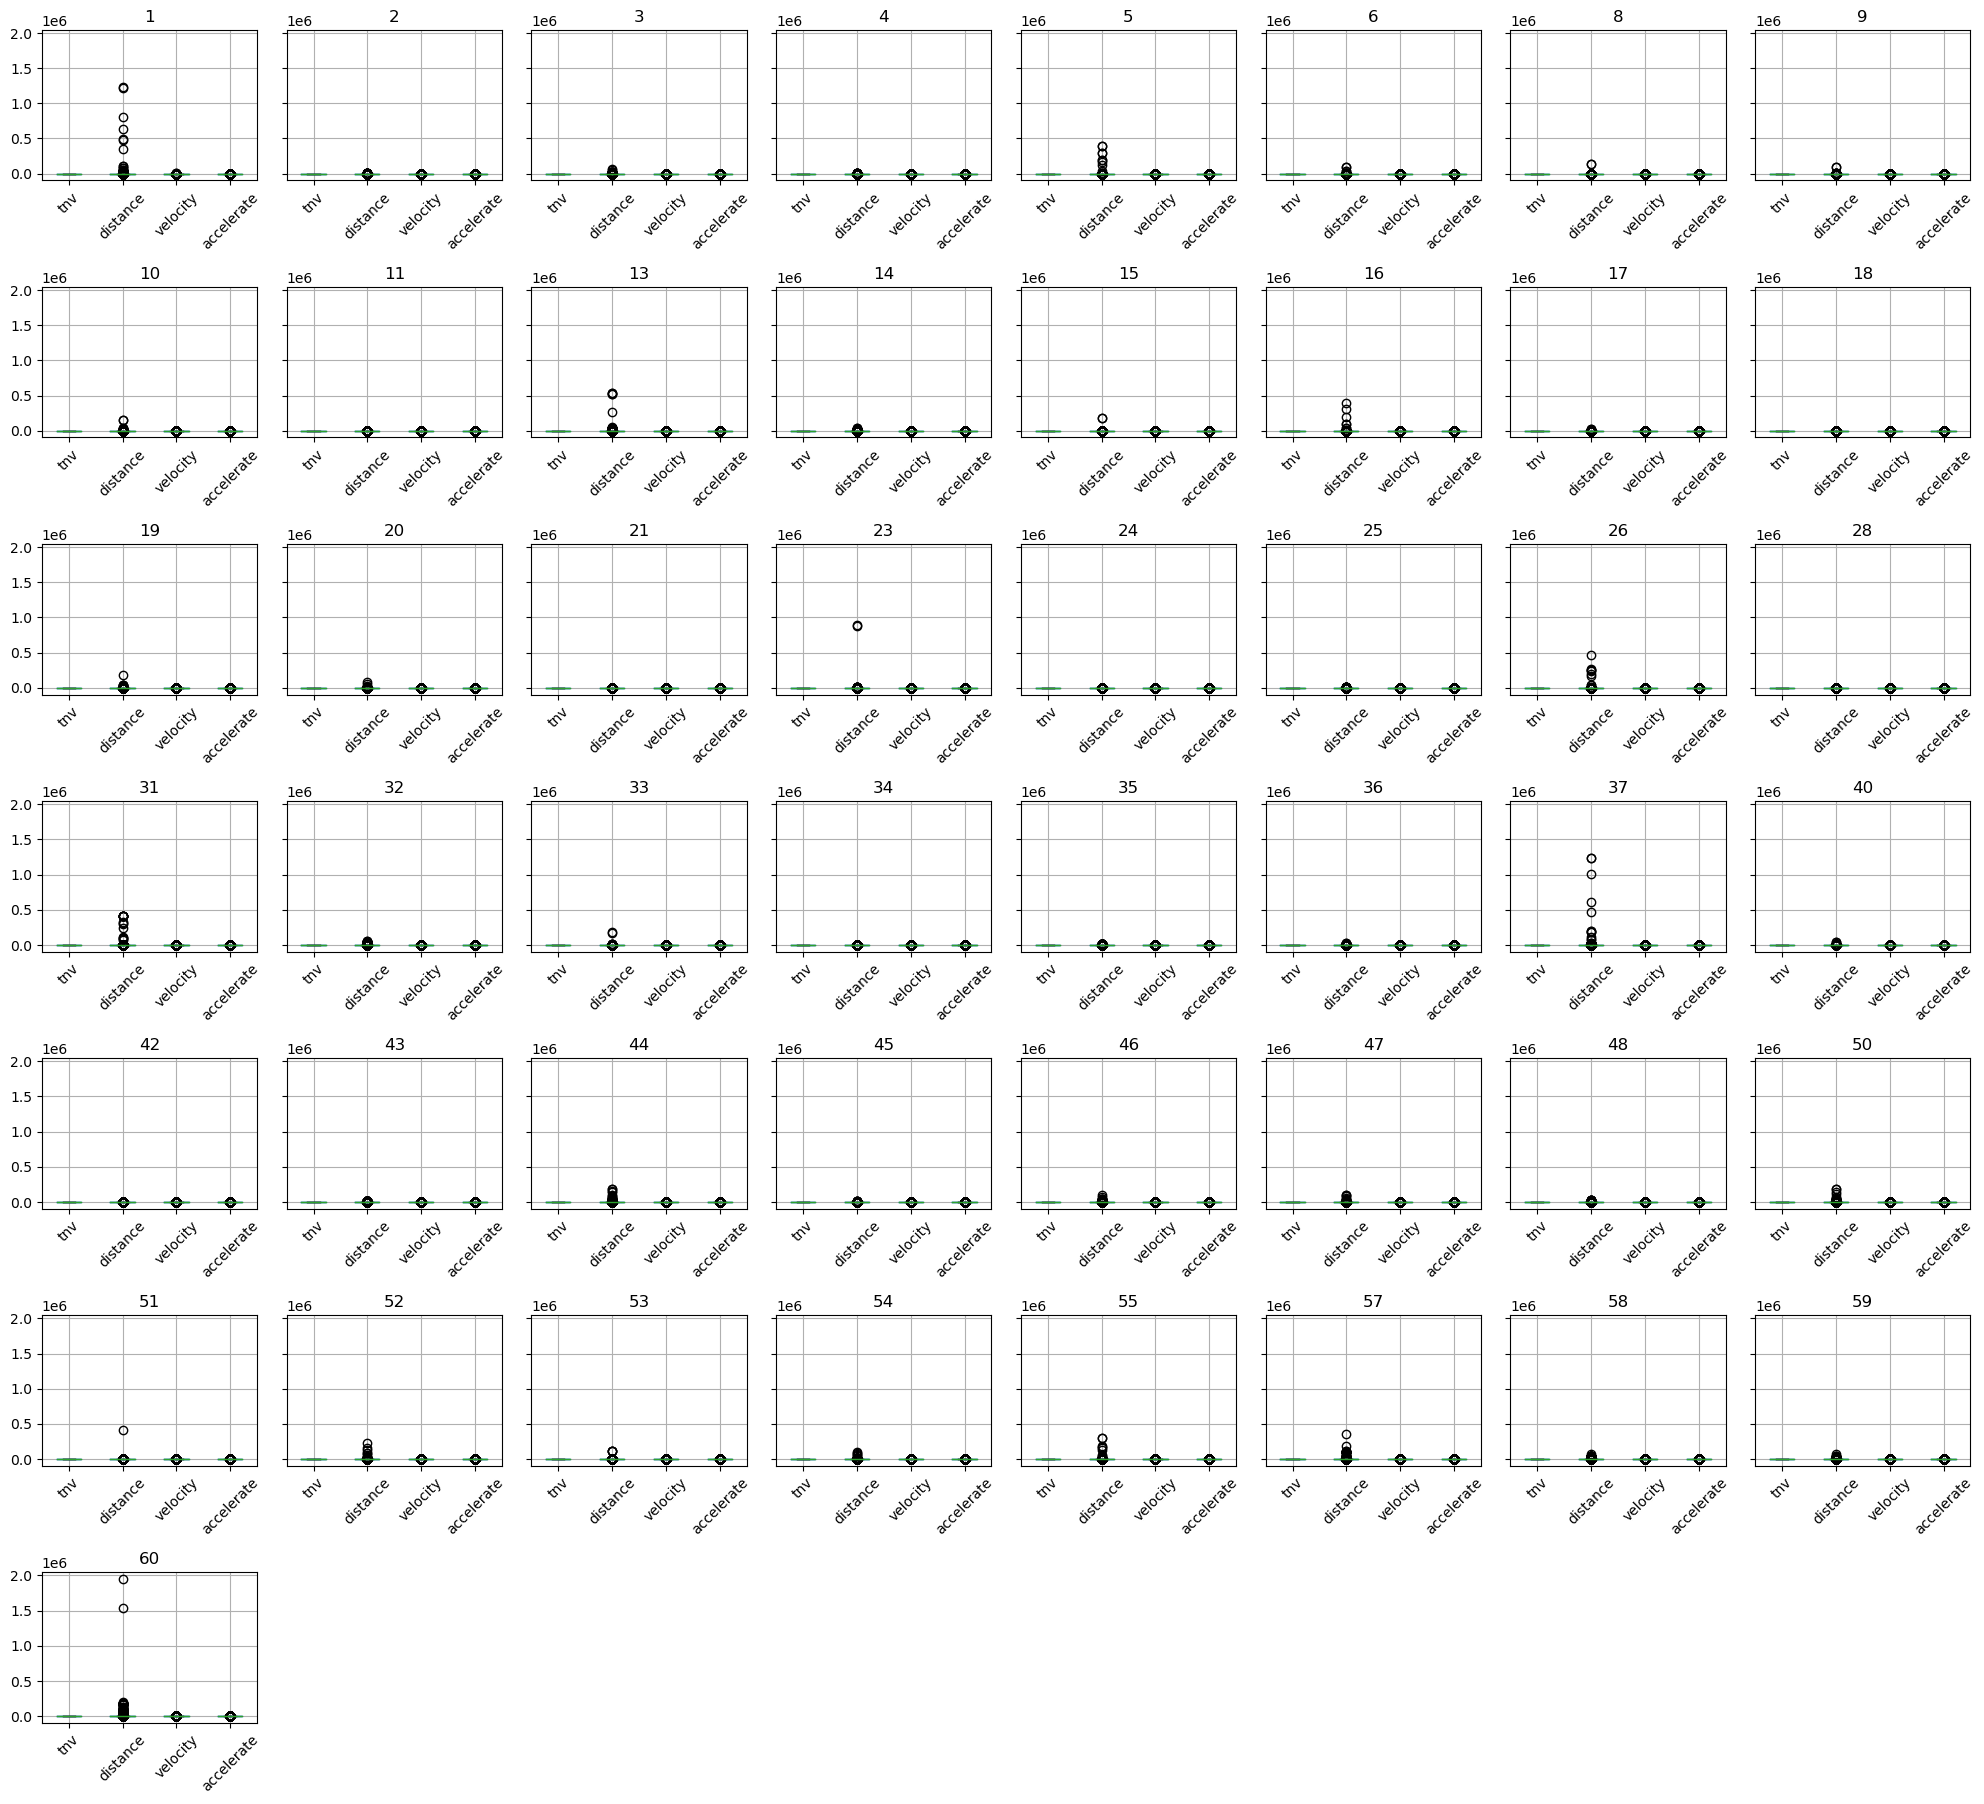

In [21]:

groupdata=data.groupby('tnv')
groupdata.boxplot(rot=45,figsize=(20,20),layout=(8,8))
plt.tight_layout()



In [22]:
data

,tnv,distance,velocity,accelerate
0,1,0.000000,0.000000,0.000000e+00
1,1,50.552643,0.042805,3.624466e-05
2,1,50.580087,0.041459,3.398286e-05
3,1,0.027444,0.000023,1.909046e-08
4,1,0.000000,0.000000,0.000000e+00
...,...,...,...,...
202872,60,0.738769,0.001229,2.045313e-06
202873,60,3.401125,0.005678,9.479141e-06
202874,60,1.923587,0.003206,5.343298e-06
202875,60,0.487866,0.000813,1.355184e-06


In [23]:
data[data['velocity']>20]

,tnv,distance,velocity,accelerate
439,1,421.373103,60.196158,8.599451
888,1,8658.933135,2886.311045,962.103682
1242,1,7850.765551,1962.691388,490.672847
1244,1,8635.670916,431.783546,21.589177
1642,1,9248.352319,20.415789,0.045068
...,...,...,...,...
202841,60,12826.494004,20.856088,0.033912
202842,60,17986.817335,30.641938,0.052201
202843,60,24660.775697,20.602152,0.017211
202850,60,642.642136,160.660534,40.165134


In [24]:
data[data['velocity']>20].index.shape

(578,)

In [25]:
data=data.drop(data[data['velocity']>10].index)
data=data.drop(data[data['distance']>2000].index)
data=data.drop(data[data['accelerate']>1].index)

In [26]:
data.describe()

,tnv,distance,velocity,accelerate
count,199690.000000,199690.000000,199690.000000,1.996900e+05
mean,29.262767,39.781200,0.044524,7.809113e-04
std,18.920160,149.547925,0.219253,1.993122e-02
min,1.000000,0.000000,0.000000,0.000000e+00
25%,13.000000,1.029468,0.001029,9.532191e-07
50%,28.000000,2.964898,0.003043,2.980333e-06
75%,47.000000,8.029930,0.008453,9.608330e-06
max,60.000000,1999.475472,9.876704,9.971015e-01


In [27]:
data.groupby('tnv').describe()

distance                                                                \
       count        mean         std  min       25%        50%         75%   
tnv                                                                          
1     3946.0   74.144749  246.173050  0.0  0.000000   0.384327    7.192571   
2     5516.0   30.735322  109.944305  0.0  1.029470   3.362937    8.922135   
3     6574.0   33.915519  115.446442  0.0  1.015742   2.525629    5.696375   
4     3493.0   10.990451   62.926268  0.0  0.919667   2.058957    4.063009   
5     3596.0   58.806389  128.463810  0.0  1.276545   3.815958   23.070879   
6     5366.0   29.841839  111.611701  0.0  0.988306   2.546243    6.118446   
8     3101.0   44.910322  150.028586  0.0  1.043213   2.360956    4.694459   
9     6185.0   33.388485  109.060978  0.0  1.509901   3.788521    8.688790   
10    4984.0   35.548246  122.743527  0.0  1.194183   2.813894    6.342946   
11    4448.0   36.058671  105.368514  0.0  1.605985   3.788507    8.606503   
13    6265.0   55.297220  226.143222  0.0  1.277039   3.542753   10.999018   
14    6425.0   28.507824  157.821872  0.0  0.809850   2.278563    5.588321   
15    3791.0   39.303622  106.477186  0.0  1.839336   4.481051   12.195164   
16    1775.0   41.846196  126.224371  0.0  1.489316   4.255236   11.639051   
17    5878.0   25.870817  103.590268  0.0  1.002034   2.347233    4.896929   
18    6391.0   19.097183   73.404726  0.0  1.441277   3.527699    6.931858   
19    3684.0   27.910608  101.704458  0.0  1.070647   2.621714    5.644910   
20    4581.0   33.922407  119.980915  0.0  1.331446   3.129581    6.986659   
21    2832.0   15.696007   61.034164  0.0  1.331458   3.356093    7.443125   
23    3715.0   25.609614   87.270949  0.0  1.166750   2.717843    5.874971   
24    2878.0   22.681402   70.906283  0.0  1.907966   4.756185   11.553143   
25    2139.0   23.900237   82.756920  0.0  1.111831   2.484423    5.264038   
26    1785.0   61.086443  181.931394  0.0  1.207953   3.514042   10.020516   
28    4435.0   22.309400   77.580252  0.0  1.825621   5.229786   11.036080   
31    3812.0   47.237163  138.898517  0.0  2.278604   6.690207   19.642767   
32    3948.0   40.044650  170.554289  0.0  0.947252   3.376676   11.805034   
33    3798.0   42.188213  153.209713  0.0  1.798172   4.447317    9.838470   
34    2800.0   26.346940   97.627747  0.0  1.249113   3.115919    6.804984   
35    2012.0   62.452383  246.503776  0.0  0.288234   3.218711   10.325123   
36    4284.0   20.024876   98.359460  0.0  0.960847   2.209961    4.364988   
37    5211.0   40.832301  160.543522  0.0  0.878482   2.429552    6.288575   
40    1326.0   14.729828   46.130377  0.0  2.200317   6.673040   15.927417   
42    3031.0   29.209486   96.577961  0.0  1.688355   3.884591    8.592772   
43    2849.0   28.392011  139.347023  0.0  1.318077   3.144164    6.629718   
44    4254.0   30.385485  103.833425  0.0  1.870223   5.270922   14.734155   
45    4022.0   28.835951  151.331233  0.0  1.812018   5.243655   12.533126   
46    2204.0   82.618485  288.497239  0.0  1.235355   5.428542   15.162818   
47    3681.0   55.316367  153.340620  0.0  1.276561   2.951188    9.347616   
48    3322.0   28.846698  141.365364  0.0  0.096098   1.434405    4.626410   
50    3874.0   69.843901  166.005100  0.0  1.303992   3.884589   30.735423   
51    2925.0   13.627795   63.231391  0.0  0.851029   1.907953    3.815926   
52    6295.0   53.033617  228.420498  0.0  0.000000   0.109818    2.237384   
53    5019.0   51.054989  142.244674  0.0  1.715780   5.051233   15.634118   
54    3897.0   15.291794   62.444684  0.0  1.262825   2.917167    6.039561   
55    2502.0  215.211419  343.619738  0.0  0.000000  12.575218  297.501605   
57    3497.0   71.186245  265.527537  0.0  0.165354   2.086279    6.204252   
58    5773.0   56.970401  167.211846  0.0  1.290270   3.610089   18.997730   
59    5949.0   24.570995  119.450381  0.0  0.796124   1.702063    3.239410   
60    5622.0   50.093429  

In [28]:
visualdf=pd.DataFrame()
visualdf['tnv']=data['tnv']
visualdf['distance']=data['distance']
visualdf['velocity']=data['velocity']*200
visualdf['accelerate']=data['accelerate']*1400


In [29]:
data

,tnv,distance,velocity,accelerate
0,1,0.000000,0.000000,0.000000e+00
1,1,50.552643,0.042805,3.624466e-05
2,1,50.580087,0.041459,3.398286e-05
3,1,0.027444,0.000023,1.909046e-08
4,1,0.000000,0.000000,0.000000e+00
...,...,...,...,...
202872,60,0.738769,0.001229,2.045313e-06
202873,60,3.401125,0.005678,9.479141e-06
202874,60,1.923587,0.003206,5.343298e-06
202875,60,0.487866,0.000813,1.355184e-06


/var/folders/qq/ckqvfttx4vs_68cbq08jts2c0000gn/T/ipykernel_5101/3884068141.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  groupvisualdf.boxplot(rot=45,layout=(15,4), ax=ax)


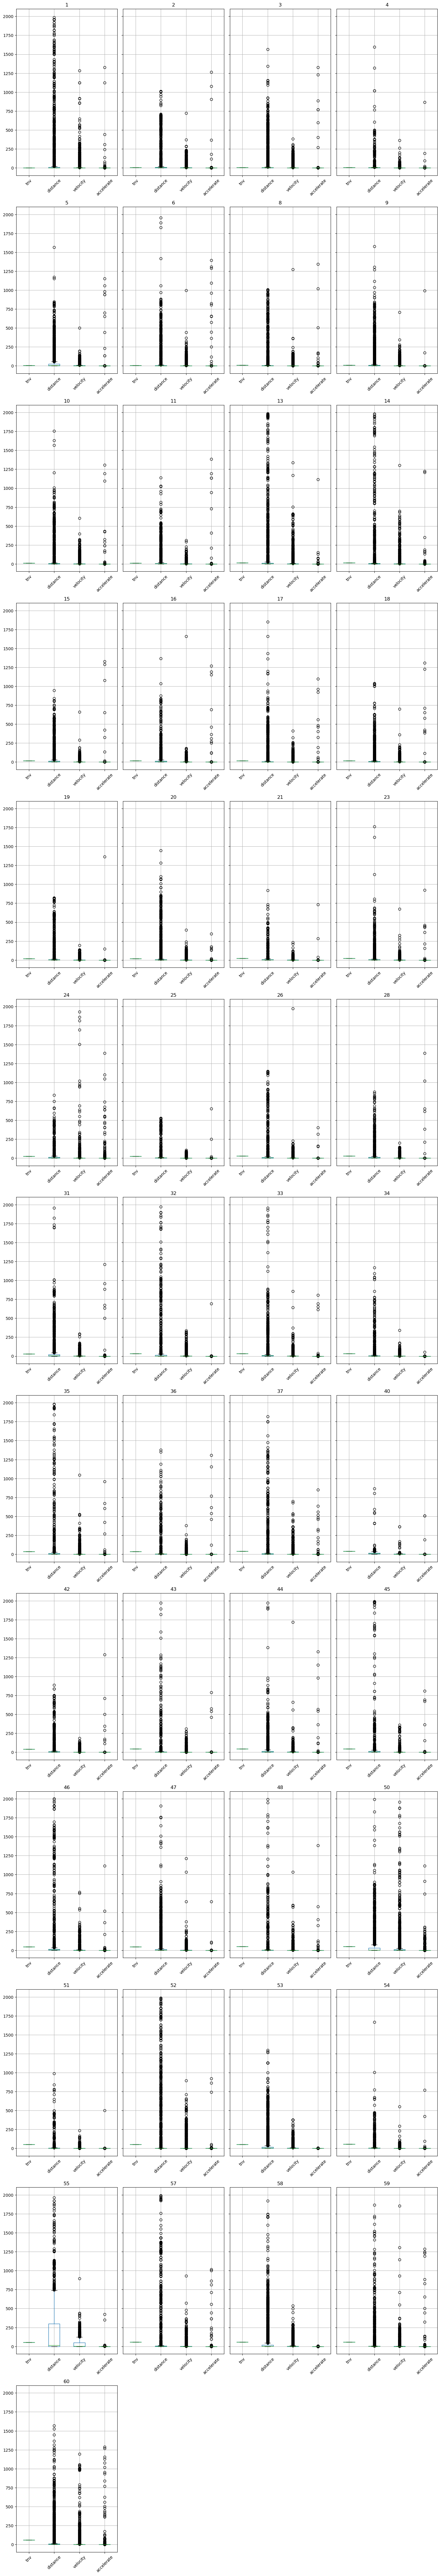

In [30]:
groupvisualdf=visualdf.groupby('tnv')
fig,ax=plt.subplots(figsize=(15,100))
groupvisualdf.boxplot(rot=45,layout=(15,4), ax=ax)
# ax.set_yscale('log')
plt.tight_layout()

In [31]:
visualdata=pd.DataFrame()
visualdata['tnv']=data['tnv']/50
visualdata['distance']=data['distance']/2000*6
visualdata['velocity']=data['velocity']
visualdata['accelerate']=data['accelerate']*6
# visualdata['accelerate']=visualdata['accelerate']
visualdata.describe()


,tnv,distance,velocity,accelerate
count,199690.000000,199690.000000,199690.000000,199690.000000
mean,0.585255,0.119344,0.044524,0.004685
std,0.378403,0.448644,0.219253,0.119587
min,0.020000,0.000000,0.000000,0.000000
25%,0.260000,0.003088,0.001029,0.000006
50%,0.560000,0.008895,0.003043,0.000018
75%,0.940000,0.024090,0.008453,0.000058
max,1.200000,5.998426,9.876704,5.982609


/var/folders/qq/ckqvfttx4vs_68cbq08jts2c0000gn/T/ipykernel_5101/3967147926.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  groupvisualdata.boxplot(rot=45,layout=(15,4), ax=ax)


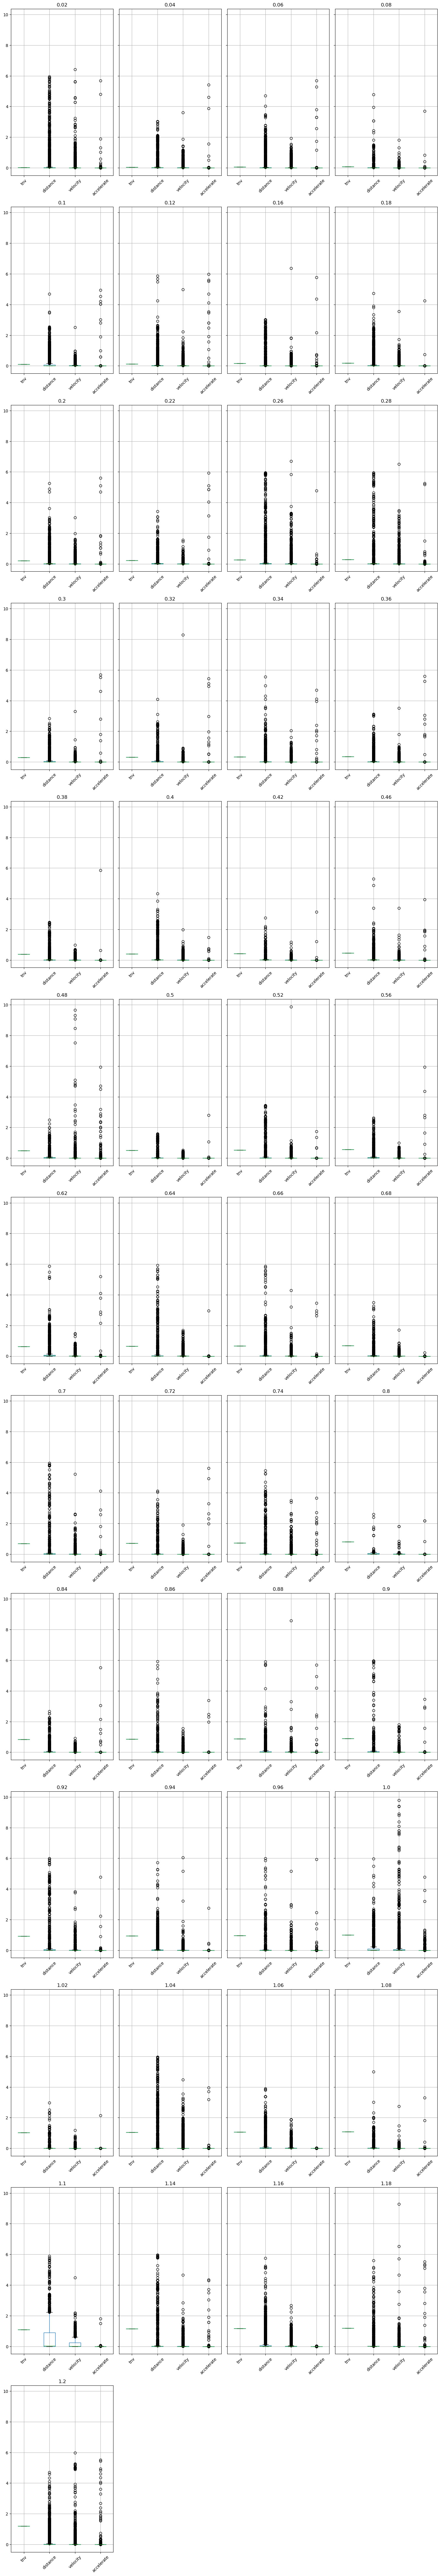

In [32]:
groupvisualdata=visualdata.groupby('tnv')
fig,ax=plt.subplots(figsize=(15,100))
groupvisualdata.boxplot(rot=45,layout=(15,4), ax=ax)
# ax.set_yscale('log')
plt.tight_layout()

In [33]:
visualdata.describe()

,tnv,distance,velocity,accelerate
count,199690.000000,199690.000000,199690.000000,199690.000000
mean,0.585255,0.119344,0.044524,0.004685
std,0.378403,0.448644,0.219253,0.119587
min,0.020000,0.000000,0.000000,0.000000
25%,0.260000,0.003088,0.001029,0.000006
50%,0.560000,0.008895,0.003043,0.000018
75%,0.940000,0.024090,0.008453,0.000058
max,1.200000,5.998426,9.876704,5.982609


In [34]:
data

,tnv,distance,velocity,accelerate
0,1,0.000000,0.000000,0.000000e+00
1,1,50.552643,0.042805,3.624466e-05
2,1,50.580087,0.041459,3.398286e-05
3,1,0.027444,0.000023,1.909046e-08
4,1,0.000000,0.000000,0.000000e+00
...,...,...,...,...
202872,60,0.738769,0.001229,2.045313e-06
202873,60,3.401125,0.005678,9.479141e-06
202874,60,1.923587,0.003206,5.343298e-06
202875,60,0.487866,0.000813,1.355184e-06
